In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from numpy import linalg as LA

sns.set_theme()

# __Information Theory Notes__

This notes are based on the lecture notes of professor M. Allegra for the master degree in Physics of Data at University of Padua (AA 2022/2023).

<a id="main"></a>

### Contents:
- 1. [Entropy](#1)
        - 1.1. [Information from probability](#1.1)
        - 1.2. [Information from events](#1.2)
        - 1.3. [Shannon entropy](#1.3)
        - 1.4. [Kullback-Leiber divergence](#1.4)
        - 1.5. [Joint entropy, mutual information and conditional entropy](#1.5)
- 2. [Information compression](#2)      
        - 2.1 [Lossy coding](#2.1)
        - 2.2 [Lossless coding](#2.2)
            - 2.2.1. [Prefix code](#2.2.1)
            - 2.2.2 [Kraft's inequality](#2.2.2)
            - 2.2.3. [Hufman code](#2.2.3)
- 3. [Noisy Channel](#5)
        - 3.1. [Decoding as inference problem](#3.1)
        - 3.2. [Error correcting codes](#3.2)


<a id="1"></a>
<a href ="#main"><p style="text-align: right;">return to contents</p></a>

## 1. Entropy

<a id="1.1"></a>

### 1.1. Information from probability
We can define the *information* associated to the random variable $X$ as:
- the quantity of *uncertain* we have before the outcome is known
- the quantity of *knowledge* we hava after the outcome is known

<a id="1.2"></a>

### 1.2. Information for events
Consider an *probability space* $\mathcal{S}=(\Omega,\mathcal{F},P)$ where:
- $\Omega$ is the *set of outcomes*
- $\mathcal{F}$ is a $\sigma$-algebra of *events* (an event $E \in \mathcal{F}$ is a collection of outcomes)
- $P$ is a probability $P:\mathcal{F}\rightarrow [0,1] \quad$ s.t. $\forall$ disjoint $a,b\in\mathcal{F}:\quad P(a\cup b)=P(a)+P(b),\quad P(\bar{a})= 1- P(a),\quad P(\Omega)=1$

Now let's try to build up a function $I:\mathcal{F}\rightarrow \mathbb{R}^+$ associating to each event the degree of information it provides about the outcome.
1. events with the same number of outcomes provide the same ammount of information $\Rightarrow I$ should be a function of probability of events: $I(E\in \mathcal{F})=f(P(E))$ 
2. events with more outcomes provide less information than events with less outcomes $\Rightarrow f$ should be monotonically decreasing function of $P$
3. if $E_1 \cap E_2$ and $E_1,E_2$ are independent: $I(E)=I(E_1)+I(E_2)$
4. for independent events, $P(E_1 \cup E_2)$, $f(P(A)P(B))=f(P(A))+f(P(B)) \Rightarrow f(x\cdot y)=f(x)+f(y)$

Given this costrains we can coclude that $f$ must be proportional to the logarithmic function

$$
f(x)=-\alpha\log(x)
$$
$$
I:\mathcal{F}\rightarrow \mathbb{R}^+, \quad I(E)=-\alpha\log(P(E))
$$

This function measures the information we obtain when we get to know that the outcome of a random process is among a given subset of all possible outcomes, specified by the event $E$.

<a id="1.3"></a>

### 1.3. Shannon entropy
Given a *random variable* $X:\Omega \rightarrow \{x_1,x_2,...x_N\}\in \mathbb{R}$, the *Shannon entropy* is defined as:
$$
H[X]=-\sum_{i=1}^N p_X(x_i) \log(p_X(x_i))
$$
and it is the average information needed to specify the outcome of a random variable. 
- $H[X]$ is positive and it is zero only if the outcome has probability 1. 
- $H[X]$ is maximized if $p_X(i)=1/N$ $\forall i$ (uniform probaility).
- $H[X]$ is concave with respect to $p$, this implies that *mixing two probability distributions increases entropy*

<a id="1.4"></a>

### 1.4. Kullback-Leiber divergence

The *Kullback-Leibler divergence* (or relative entropy) is defined as:
$$
D_{KL}[X_1||X_2]=D_{KL}(p||q)=\sum_i p_i \log(\frac{p_i}{q_i})
$$

and it satisfies the Gibbs' inequality:
$$
D_{KL}(p||q) \ge 0
$$ 
where equality holds only if $p=q$.


$D_{KL}$ can be thought as a measure of discriminability between two distributions (be carefoul: it is not a distance sice is not symmetrical $D_{KL}(p||q)\neq D_{KL}(q||p)$).

$D_{KL}$ is convex with respect to both arguments, this implies that *mixing decreases discriminability*.

In [21]:
# Shannon entropy:

def entropy(p):
    idx = np.where(np.logical_and(p>0, p<1))
    h = -np.sum(np.multiply(p[idx], np.log2(p[idx])))
    return h
    

<a id="1.5"></a>

### 1.5 Joint entropy, mutual information and conditional entropy

Given two randdom variables $X, Y$ with values $\{x_i\}, \{y_i\}$ we define the *joint entropy* as the Shannon entropy of the joint distribution $P_{X,Y}(x_i,y_i)=p_{i,j}$:
$$
H[X,Y]= H(P_{X,Y})=-\sum_{i,j}p_{i,j}\log(p_{i,j})
$$
and given the marginal distributions $p_i=p_X(x_i), p_j=p_Y(x_j)$ and supposing obtaining $X=x_i$, the *conditional entropy* of $Y$ is:
$$
H(Y|x_i)=-\sum_j\frac{p_{i,j}}{p_i}\log \frac{p_{i,j}}{p_i}
$$

Averagin over all possible outcomes of X we obtain the *conditional entropy of $Y$ given $X=x$* is:
$$
\begin{split}
H[X|Y]&=\sum_i H[Y|x_i]= - \sum_i p_i \sum_j \frac{p_{i,j}}{p_i}\log(\frac{p_{i,j}}{p_i}) \\
& = H[X,Y] - H[Y]
\end{split}
$$

The *mutual information between X and Y* is:
$$
\begin{split}
I[X:Y]&=H[X]+H[Y]-H[X,Y]\\
&=H[Y]-H[Y|X]\\
&=H[X]-H[X|Y]
\end{split}
$$
Thus, the mutual information can be interpreted as the information that X provides about Y , and vice versa.
In terms of the KL divergence:
$$
I[X:Y]=D_{KL}(p_{i,j}||p_iq_j)\ge 0
$$

when the equality holds only if $p_{i,j}=p_iq_j$ i.e. when $X$ and $Y$ are independent ($X$ does not provide any information on $Y$).

-----------

<a id="2"></a>
<a href ="#main"><p style="text-align: right;">return to contents</p></a>

## 2. Information compression

In a typical telecommunication setup, a *sender* should transmit a message to a distant receiver through a channel, which can be interpreted as any physical means allowing message transmission. To this aim, the sender must first convert the message into a suitable form that can be sent through the channel: this operation is called *encoding*. At her end of the communication line, the receiver should then properly reconstruct the original message: this operation is called *decoding*.

The encoded message should satisfy two requirements:
- It should allow faithful reconstruction of the message the receiving (*minimal information loss*).
- it should be be *as short as possible* (compatibly with the possibility of faithful reconstruction at the receiving end), so as maximise the number of messages, or the complexity of messages, that can be transmitted in a given amount of time. In other words, to *maximise the information transmission rate*.

Let us assume that the message to be transmitted $x$ is selected with a certain probability from a finite set of messages $\mathcal{A}_X = x_i,...,x_n$ . We can thus consider $X$ as a random variable with values in $\mathcal{A}_X$ and probability mass function $p_X(x)$. Let us encode each $X \in \mathcal{A}_X$ into a binary string of length $K$:

$$
E: \mathcal{A}_X \rightarrow B^K, \quad E: x \mapsto  y
$$
where  $B^K={0,1}^K$ set of all possible binary strings of length $K$. If we want to recostruct $x$ from $y$ the encoding must be reversible:
$$
D=E^{-1}: B^K \rightarrow \mathcal{A}_X, \quad D: y \mapsto  x
$$
For $E$ to be invertible, $E$ should be injective, mapping each different $x \in \mathcal{A}_X$ into a different $y \in B^K$. Since $|B_K|=2^K$,if we want to map each $x \in \mathcal{A}_X$ into a different $y \in B^K$ ,we must have $2^K >|\mathcal{A}_X|$ or

$$
K \ge H_0=\log(|\mathcal{A}_X|)
$$
we call $H_0$ *raw bit content*. Reversibility thus demands that at least $K$ digits be used to encode the message.

There are only two ways of compressing the information further:
- in *lossy coding*, one tolerates that two different $x$ be mapped to the same $y$ (or that some $x$ are discarded), but demands that this occurs with a small probability-
- in *lossless coding*, one allows variable-length codes; different $x$ are mapped into binary strings of different length $l_x$; some $l_x$ are lower, some larger than $l_0$. We cannot obtain $l-x < H_0(X)$ for all $x$ (this would violate the counting argument), but we can obtain $⟨l_x⟩ = \sum_{x \in \mathcal{A}_X} p_X(x)l_x < H_0$ (by mapping more probable $x$ into shorter sequences and less probable $x$ into longer sequences).

### 2.1 Lossy coding

Let's consider biased coin: $X=\{h,t\}$ with $P(H)=9/10$ and $P(T)=1/10$. If we want to communicate the result of the toss we need to encode the result in a binary digit:
$$
E:h \mapsto 0, \quad t \mapsto 1
$$
We can verify that the raw bit content is greater of the corresponding Shannon entropy.

In [22]:
P_h=9/10
P_t=1/10

df=pd.DataFrame({"Events":["h","t"],"Probabilities":[P_h,P_t]})
print(df,"\n")

print("Raw bit contet of X:\t",np.log2(len(df["Events"])))                         # H_0
print("Shannon entropy of X:\t",entropy(np.array(df["Probabilities"])),"\n")       # H(X) 
print("H_0 > H[X]:",np.log2(len(df["Events"]))>entropy(np.array(df["Probabilities"])))


  Events  Probabilities
0      h            0.9
1      t            0.1 

Raw bit contet of X:	 1.0
Shannon entropy of X:	 0.4689955935892812 

H_0 > H[X]: True


Now consider the 3 indipendent tosses of the biased coin: $X^{(3)}= X \times X \times X$.

Since the coins are biassed, we can notice that the outcomes with more than one $t$ are very unlikley ($P\{htt,tht,tth,ttt\}=28/1000$)

In [23]:
p_hhh=df["Probabilities"][0]**3
p_hht=p_hth=p_thh=(df["Probabilities"][0]**2)*df["Probabilities"][1]
p_htt=p_tht=p_tth=(df["Probabilities"][1]**2)*df["Probabilities"][0]
p_ttt=df["Probabilities"][1]**3

X_3=np.array([p_hhh,p_hht,p_hth,p_thh,p_htt,p_tht,p_tth,p_ttt])

print("P(hhh):\t\t\t",p_hhh)
print("P(hht)=P(hth)=P(thh):\t",p_hht)
print("P(tth)=P(hth)=P(htt):\t",p_htt)
print("P(ttt):\t\t\t",p_ttt,"\n")

H_X_3=entropy(X_3)
print("Shannon entropy of X^(3):",H_X_3)
print("Raw bit content of X^(3):",np.log2(len(X_3)),"\n")

print("P({htt,tht,tth,ttt}):",p_htt+p_tht+p_tth+p_ttt)      

P(hhh):			 0.7290000000000001
P(hht)=P(hth)=P(thh):	 0.08100000000000002
P(tth)=P(hth)=P(htt):	 0.009000000000000003
P(ttt):			 0.0010000000000000002 

Shannon entropy of X^(3): 1.4069867807678436
Raw bit content of X^(3): 3.0 

P({htt,tht,tth,ttt}): 0.02800000000000001


we can encode the outcomes of X^(3) in binary strings like: 
$$
E: hhh \mapsto 000, \quad hht \mapsto 001, \quad hth \mapsto 010, \quad ... \quad, \quad ttt \mapsto 111
$$

The minimum number of digits required to encode those outcomes is the Raw bit content $H_0[X^{(3)}]=3$
In this way we have no problem in decoding (the relation is biunivocal): i.e $010 \mapsto hth$

Now consider the new encoding: 
$$
\tilde{E}: hhh\mapsto 00, \quad hht\mapsto 01, \quad hth\mapsto 10, \quad thh \mapsto 11 
$$
$$
htt \mapsto \emptyset, \quad tht \mapsto \emptyset, \quad tth \mapsto \emptyset, \quad ttt\mapsto \emptyset
$$
we simply discard the four least probable outcomes. We can decode the original message by:

$$
\tilde{D}: 00\mapsto hhh, \quad 01\mapsto hht, \quad 10 \mapsto hth, \quad 11 \mapsto thh, \quad \emptyset \mapsto \emptyset
$$
In this way for our biased coin we accept a 2.8% of error (we lose some information!).

We can define the *error probability* $P_e=P[X'\neq X]$ where $X'$ is the recostucted message by decoding.

Let's try to generalize this argument: consider a $\delta$-sufficient subset
$$
S_{\delta}[X]=\argmin_{|S|}(S \subset \mathcal{A}_X | P(X\in S)>1-\delta)
$$
this is the set of "relevant messages". In practice, this is obtained by sorting the outcomes by decreasing probability and keeping the first $k$ outcomes as soon as $\sum_{i=1}^k p(x_k ^{\text{sorted}})> 1- \delta$. The *essential bit content* is defined as:
$$
H_\delta(X)=\log S_\delta [X]
$$

This is the number of digits required to encode X if we tolerate an error probability $\delta$.

An important result is that for long sequences $X^{(n)}$ with $n\rightarrow \infty$ we have: $H_d(X^{(n)})\rightarrow nH[X]$ for all $\delta$.In other words, we can describe the outcome with $nH(X)$ binary digits with a vanishingly small error probability. This important result is called *Shannon’s “source coding theorem”* which mathematical steatment is:
$$
\forall \delta > 0, \forall \beta > 0, \quad \exists n_0 \quad \text{s.t.} \quad \forall n > n_0, \quad |H_\delta(X^{(n)})-nH|<n\beta 
$$
Shannon’s source coding theorem implies fundamental limits for information conversion and compression: 
- The information of n independent realizations of a random variable $X$ can be transmitted in a message
of $H[X]$ binary digits with asymptotically vanishing information loss.
- The information of $n$ independent realizations of a random variable $X$ can be effectively compressed into a binary string using $nH[X]$ binary digits per realization.

This theorem result is based on the existence of *typical sequences*.

In the limit of large $n$, typical sequences are those with $m_i \cong nP_i$ values of $x_i$ for all $i = 1, ... , N$.

In the above exemple of biased coin we have sequences with $0.9n$ zeros and $0.1n$ ones. The probability of any such sequence $x^{(n)}$ is approximally:
$$
P(x^{(x)})_{\text{typ}}=p_1^{np_1}\cdot p_2^{np_2}\cdot ... \cdot p_K^{np_K}
$$
so the information content is 
$$
I=-\log P(x^{(n)})_{\text{typ}}=nH[X]
$$

In [24]:
def essential_bit_content(p,delta,verbose=False):
    bits = 0
    p_sum = 0
    p[::-1].sort()          # decrescing order
 
    for i, prob in enumerate(p):
        p_sum += prob 
        bits = i+1
        if verbose:
            print("* iteration:", i)
            print("1-delta:",1-delta)
            print("p_sum:\t", p_sum)
            print("bits:\t", bits)
            print("------------------------------")
        if p_sum > (1-delta):
            return(np.log2(bits))

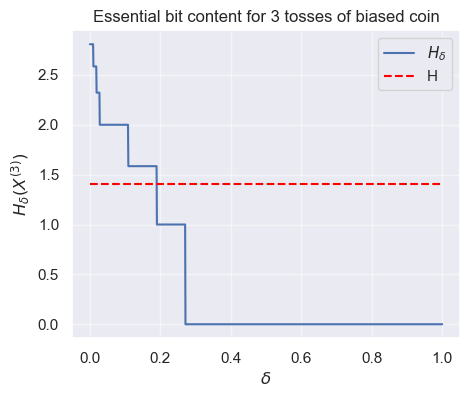

In [25]:
H_d=[]
delta=np.linspace(0,1,1000)
for d in delta:
    H_d.append( essential_bit_content(X_3,d))

H_d=np.array(H_d)
H_d[H_d==None]=H_d[1]
   
plt.figure(figsize=(5,4))   
plt.plot(delta,H_d, label= "$H_{\delta}$")
plt.hlines(y=entropy(X_3), xmin=0, xmax=1, linestyles="dashed", colors="red", label="H")
plt.xlabel("$\delta$")
plt.ylabel("$H_{\delta}(X^{(3)})$")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Essential bit content for 3 tosses of biased coin")
plt.show()

-----------------------
### Exercise:

Consider a random variable X with values in
$$
A_X = {x_1,...,x_8}
$$
and probability mass function:
$$
P_X = {1/4,1/4,1/4,3/16,1/64,1/64,1/64,1/64}
$$

* What is the information content of each outcome $x_i$?
* What is the entropy of the distribution?
* Plot the essential bit content $H_\delta(X)$ as a function of the error $\delta$.

Consider $X^{(3)} = X ×X ×X $:

* what is the entropy of $X^{(3)}$?
* Plot $H_\delta(X^{(3)})$ as a function of $\delta$
* How any binary strings we need to represent $H_\delta(X)$ if we allow an error of
1%?


  Events  Probabilities
0    x_1       0.250000
1    x_2       0.250000
2    x_3       0.250000
3    x_4       0.187500
4    x_5       0.015625
5    x_6       0.015625
6    x_7       0.015625
7    x_8       0.015625 

Information for x_1, x_2, x_3:		 0.5
Information for x_4:			 0.45281953111478324
Information for x_5, x_6, x_7, x_8:	 0.09375 

Entropy of the distribution:		 2.327819531114783
Raw bit content:			 3.0 



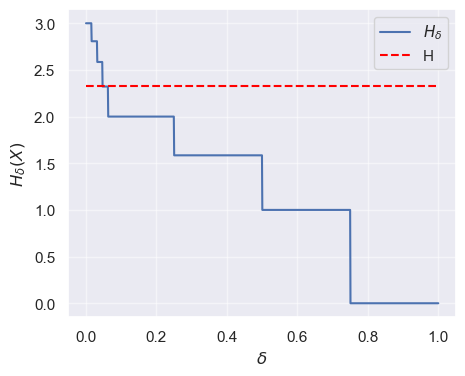

Binary strings needed to represent X with 1% error: 2.0


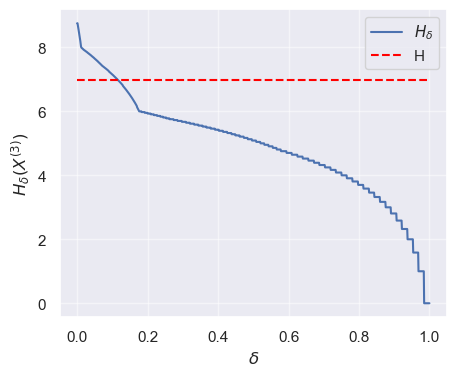

Binary strings needed to represent X^(3) with 1% error: 7.0


In [26]:
P_x=np.array([1/4,1/4,1/4,3/16,1/64,1/64,1/64,1/64])
events=["x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8"]
df=pd.DataFrame({"Events":events,"Probabilities":P_x})
print(df,"\n")

I_123=-P_x[0]*np.log2(P_x[0])
I_4=-P_x[3]*np.log2(P_x[3])
I_5678=-P_x[4]*np.log2(P_x[4])

print("Information for x_1, x_2, x_3:\t\t", I_123)
print("Information for x_4:\t\t\t", I_4)
print("Information for x_5, x_6, x_7, x_8:\t", I_5678,"\n")

I_tot=entropy(P_x)

print("Entropy of the distribution:\t\t", I_tot)

print("Raw bit content:\t\t\t", np.log2(len(P_x)),"\n")

# Essential bit content:

delta=np.linspace(0,1,1000)
H_d=[]

for d in delta:
    H_d.append( essential_bit_content(P_x,d))

H_d=np.array(H_d)
H_d[H_d==None]=H_d[1]
   
plt.figure(figsize=(5,4))   
plt.plot(delta,H_d, label= "$H_{\delta}$")
plt.hlines(y=I_tot, xmin=0, xmax=1, linestyles="dashed", colors="red", label="H")
plt.xlabel("$\delta$")
plt.ylabel("$H_{\delta}(X)$")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

print("Binary strings needed to represent X with 1% error:", np.round(essential_bit_content(P_x,0.1),0))

# now lets consider X^(3):

X_3=np.einsum("i,j,k",P_x,P_x,P_x).flatten()
I_X_3=entropy(X_3)

H_d_X_3=[]

for d in delta:
    H_d_X_3.append(essential_bit_content(X_3,d))

H_d_X_3=np.array(H_d_X_3)
H_d_X_3[H_d_X_3==None]=H_d_X_3[1]
   
plt.figure(figsize=(5,4))   
plt.plot(delta,H_d_X_3, label= "$H_{\delta}$")
plt.hlines(y=I_X_3, xmin=0, xmax=1, linestyles="dashed", colors="red", label="H")
plt.xlabel("$\delta$")
plt.ylabel("$H_{\delta}(X^{(3)})$")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

print("Binary strings needed to represent X^(3) with 1% error:", np.round(essential_bit_content(X_3,0.1),0))

------------

<a id="2.2"></a>

### 2.2. Lossless coding

Lossy coding: the string have all the same length, is efficient only for large sequences (small error, efficient compression).

We are looking for a strategy allowing not to discard any outcome. Information compression is acheived by mapping messages into binary strings of variable length wich is called *symbol coding*.
$$
E:\mathcal{A}_X \rightarrow B^+; \qquad B^+=B \cup B^2 \cup B^3 \cup ... 
$$
Thus,$E$ maps each $x_i \in \mathcal{A}_x$ into a binary code of length
$$
E:x_i \in \mathcal{A}_X \mapsto y_i \in B^{l_i}
$$
called *codeword* and $l_i$ is called *codeword length*.

Let's consider a coin toss and the following encoding 
$$
E: h \mapsto 0 \in B^1, \quad t \mapsto 101 \in B^3
$$

symbol code must satisfy:
* unique decodability
* easy decoding
* it should be as short as possible: i.e. $L[E,X]=\sum_ip_il_i$ should me minimal

<a id="2.2.1"></a>
<a href ="#main"><p style="text-align: right;">return to contents</p></a>

#### 2.2.1. Prefix code
“Easy to decode” means that messages can be decoded one by one, without needing to wait for the full message string.
To be able to identify the end of a codeword as soon as it arrives, no codeword should be a prefix of another codeword. A code is called a *prefix code* if no codeword is a prefix of another codeword.

Prefix codes are in one-to-one correspondence with *complete binary trees*, i.e., probability trees where each branching has two branches and where each leaf node corresponds to a single-outcome event.

consider $X=\{0,1,2,3\}$ with $P_X(0)=1/2$, $P_X(1)=1/4$, $P_X(2)=1/8$, $P_X(3)=1/8$

<img src="fig1.png" alt="Drawing" style="width: 500px;"/>

the tree representation of the probability space allows mapping each outcome of $X$ into a binary code: such code is a prefix code
$$
E: 0 \mapsto 0, \quad 1 \mapsto 10, \quad 2\mapsto 110, \quad 3 \mapsto 111
$$

The average length of this code is: $L(E,X)=\sum_i p_il_i=(\frac{1}{2}\cdot 1) +(\frac{1}{4}\cdot 2) + 2(\frac{1}{8}\cdot 3)=1.75$ 
and correspond to the Shannon entropy. 

This equivalence holds because $l_i=-\log p_i \rightarrow p_i=2^{-l_i}$.


In [27]:
events=[0,1,2,3]
probs=[1/2,1/4,1/8,1/8]
length=[1,2,3,3]

df=pd.DataFrame({"Events":events, "probabilities":probs,"length":length})
print(df,"\n")

def average_length(p,l):
    return(np.sum(p*l))

avg_len=average_length(df["probabilities"],df["length"])
print("average length:", avg_len)
print("Shannon entropy:", entropy(np.array(df["probabilities"])))

   Events  probabilities  length
0       0          0.500       1
1       1          0.250       2
2       2          0.125       3
3       3          0.125       3 

average length: 1.75
Shannon entropy: 1.75


<a id="2.2.2"></a>

#### 2.2.2 Kraft's inequality

We can obtain short encoding by associating probable outcomes with short codewords and improbable outcomes with long codewords.

The unique decodability imposes a constraint on codewords length that can be express by *Kraft's inequality*

$$
\sum_i 2^{-l_i} \le 1
$$

A code saturating Kraft inequality is called complete code. Prefix codes built from complete binary graphs saturate the inequality.

#### 2.2.3. Source coding theorem for symbol codes

A general lower bound to the expected code length can be expressed in terms of Shannon entropy. Consider a modified random variable $\tilde{X}$ with values in $\mathcal{A}_X$ such that $p_{\tilde{X}}(x_i)=q_i=\frac{2^{-l_i}}{\sum_j2^{-l_j}}$ with integer $l_i$.
$$
D_{KL}(p|q)=\sum_i p_i \frac{p_i}{q_i}=\sum_i p_i \log p_i - \sum_j q_i \log q_i = -H[X]+\sum_i p_il_i+\log z
$$

with $z=\sum_j2^{-l_j}$. Since $D_{KL}(p|q)\ge 0$:
$$
\sum_i p_il_i \ge H[X]+\log \frac{1}{z}
$$

equality holds if (and only if):
1. $z=1$: the code is complete
2. $p_i=2^{-l_i}$: the codelengths are equal to the information contents

The fact that:
$$
L(E,X)=D_{KL}(p|q)*H[X]+\log\frac{1}{z}
$$

suggests that an optimal encoding for given $p_i$ should try to minimize the KL term, realizing $l_i \simeq -\log p_i$.

*Source coding theorem for symbol codes*: for a random variable $X \in \mathcal{A}_X$ there exists a symbol code $E$ satisfying

$$
H[X]\le L(E,X) \le H[X]+1
$$

#### 2.2.4. Huffman codes

Hufmann code: procedure to find optumal codes (with minimum length). It's a recursvie algorithm that constructs an optimal binary tree, starting from the leaves.

Procedure:
1. create nodes for all elementary outcomes
2. consider the last two probabile nodes. Create a parent node having these two outcomes as childeren.
3. iterate, considering only nodes with no parents.

In [28]:
class Node:
    def __init__(self, value):

        self.value = value
        self.left = None
        self.right = None
        

def binary_tree(dictionary,verbose):
    N = len(dictionary)
    alphabet = [i for i in dictionary.keys()]
    dictionary_sorted = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True)) 
    leaves = list(dictionary_sorted.items())
    child_id=[]                       

    if verbose:
        print("*** binary tree *** \n")
        print("* leaves:")
        print(leaves)
        print("----------------------------------------------------------------------------")

    for i in range(N-1):
        child_sx_id = leaves[-2][0]
        child_dx_id = leaves[-1][0]
        child_sx_value = leaves[-2][1]
        child_dx_value = leaves[-1][1]  

        parent_name = f"P{i}"
        parent_value = child_sx_value + child_dx_value
        parent_leaf = [(parent_name, parent_value)]

        child_id.append([parent_name, child_sx_id, child_dx_id])

        if verbose:
            print("+ parent leaf:")
            print(parent_leaf, "<--", child_sx_id, "+", child_dx_id, "\n")

        leaves = leaves[:-2] + parent_leaf
        leaves = sorted(leaves, key=lambda x: x[1], reverse=True)

        if verbose:
            if len(leaves) != 1:
                print("* leaves:")
            else:
                print("++ root:")
            print(leaves)
            print("----------------------------------------------------------------------------")

    return alphabet, child_id


def build_huffman_tree(parent_child_relations):
    nodes = {}
    
    for relation in parent_child_relations:
        parent_val, left_val, right_val = relation
        parent_node = nodes.get(parent_val, Node(parent_val))
        left_node = nodes.get(left_val, Node(left_val))
        right_node = nodes.get(right_val, Node(right_val))
        
        parent_node.left = left_node
        parent_node.right = right_node
        
        nodes[parent_val] = parent_node
        nodes[left_val] = left_node
        nodes[right_val] = right_node
    
    return nodes[parent_val]


def generate_huffman_codes(root, code='', codes={}):
    if root:
        if root.value != "":
            codes[root.value] = code
        generate_huffman_codes(root.left, code + "0", codes)
        generate_huffman_codes(root.right, code + "1", codes)

    return codes


def huffman_encoder(dictionary,verbose=False):
    alphabet, child_id = binary_tree(dictionary,verbose=verbose)
    huffman_tree = build_huffman_tree(child_id)
    huffman_codes = generate_huffman_codes(huffman_tree)
    huffman_codes = {key: value for key, value in huffman_codes.items() if key in alphabet}
    huffman_codes = {key: huffman_codes[key] for key in alphabet}

    if verbose:
        print("\ncodewords:")
        print(huffman_codes)

    return huffman_codes
    

In [29]:
P_h=9/10
P_t=1/10

df=pd.DataFrame({"Events":["h","t"],"Probabilities":[P_h,P_t]})
print(df,"\n")

p_hhh=df["Probabilities"][0]**3
p_hht=p_hth=p_thh=df["Probabilities"][0]*df["Probabilities"][0]*df["Probabilities"][1]
p_htt=p_tht=p_tth=df["Probabilities"][0]*df["Probabilities"][1]*df["Probabilities"][1]
p_ttt=df["Probabilities"][1]*df["Probabilities"][1]*df["Probabilities"][1]

df_3=pd.DataFrame({"Events":["hhh","hht","hth","thh","htt","tht","tth","ttt"],"Probabilities":[p_hhh,p_hht,p_hth,p_thh,p_htt,p_tht,p_tth,p_ttt]})
print(df_3)

  Events  Probabilities
0      h            0.9
1      t            0.1 

  Events  Probabilities
0    hhh          0.729
1    hht          0.081
2    hth          0.081
3    thh          0.081
4    htt          0.009
5    tht          0.009
6    tth          0.009
7    ttt          0.001


In [30]:
outcomes={}
for i,j in zip(df_3["Events"],df_3["Probabilities"]):
    outcomes[i]=j

encoded_outcomes=huffman_encoder(outcomes)
encoded_outcomes

{'hhh': '0',
 'hht': '100',
 'hth': '101',
 'thh': '110',
 'htt': '11100',
 'tht': '11101',
 'tth': '11110',
 'ttt': '11111'}

--------------

<a id="3"></a>
<a href ="#main"><p style="text-align: right;">return to contents</p></a>

## 3. Noisy channel

### 3.1. Decoding as inference problem

We want trasmit the outcome of a coin toss $X \in \mathcal{A}_X=\{h,t\}$ via a noisy channel. We encode the message with a binary digit $Z \in B=\{0,1\}$, i.e.
$$
E: h \mapsto 0, \quad t \mapsto 1
$$
where $f$ is the probability that a bit flips during the trasmission.

Due to the noise, the recived message is $Y$ with:
$$
P(X=Z)=1-f, \quad P(X \neq Z)=f
$$

When the receiver decodes the signal $X'=E^{-1}(Y)$, the *probability error* is
$$
P_e=P(X'\neq X)=f
$$

The mutual information between the original message and the recived digit is:
$$
I[X:Y]=I[Z:Y]=H[X]+H[Z]-H[X,Z]
$$

Assuming the coin fair $H[X]=H[Z]=1$, and 
$$
\begin{split}
H[X,Z]&=-\sum_{xz}p_{XZ}(x,z)\log(p_{XZ}(x,z))\\
&=-2\cdot \frac{(1-f)}{2}\cdot\log\left(\frac{(1-f)}{2}\right)-2\cdot \frac{f}{2}\cdot\log\left(\frac{f}{2}\right)
\end{split}
$$

we have:
$$
I[X:Y]=1+H_2[f], \quad H_2[f]=-f\log(f) - (1-f)\log(1-f)
$$

where $H_2[f]$ is the binary entropy function.

<img src="fig2.png" alt="Drawing" style="width: 1000px;"/>

The image above displays the recostructing general problem.

- Goal: the decoder must recostruct $X'$ as close as possible to $X$

- Strategies:  maximize $P(X'=X)$ or minimize $P_e=P(X'\neq X)$.

In the general problem we have a probabilistic relation between the latent variable $X \in \mathcal{A}_X$ and the observed variable $Y \in \mathcal{A}_Y$  summarized by the probability mass function $p_{XY}(x,y)$. From $Y$ we try to reconstruct the original data via an *estimator* $X'=D(Y)$, where $D$ is a deterministic function of the observed $Y$
$$D: \mathcal{A}_Y \rightarrow \mathcal{A}_X$$

We can measure the effectiveness of the estimetor via the *loss*:
$$
l_{D}(x',x)=1-\delta(x',x)=\chi(x'\neq x)
$$

The *posterior risk*, that corresponds to the probability of error when the recived message is $y$, is defined as:
$$
r_{D}(y)=\int P_X(x|y)l_D(x'(y),x)dx
$$

The *Bayes risk* is instead:
$$
r_{D}=\int p_Y(y)r_D(y)dy=\int P_{XY}(x,y)l_D(x'(y),x)dxdy
$$
and corresponds to the overall probability of error.

The *maximum a posteriori* (MAP) *estimetor* is:
$$
D_{MAP}(y)=\argmin_D r_D(y), \implies D_{MAP}(y)=\argmax_{x'} P(x'|y)
$$

<a id="3.2"></a>

### 3.2. Error correcting codes

Error correcting code: code more robust to noise.

- Strategy: use *redundancy*

A simple instance of error-correcting code is a *repetition code* $R_K$ when the digits are repeated $K$ times, i.e:
$$
R_3:\mathcal{A}_X \rightarrow B^3, \quad h \mapsto 000, \quad t \mapsto 111
$$

We have many possibilities for the recived message depending on the number of randomly flipped bits as we can observe in the following table.

<img src="fig3.png" alt="Drawing" style="width: 1000px;"/>

 Let's denote whit $m$ the numbers of 1es in $Y$ (i.e. $m(000)=0, m(001)=1$). The receiver can decode the message based on the *majority rule* decoder $D$:
$$
D:Y \mapsto h \quad\text{if}\quad m<2, \qquad Y \mapsto t \quad\text{if}\quad m\ge 2
$$

The decoder corresponds to the MAP decoder ($x'=D_{MAP}(y)=\argmax_x P(x|y)$). For equally probable messages $P_X(0)=P_X(1)$ we have that $\argmax_x P(x|y)=\argmax_x P(y|x)$.

Let's denote M(y) the number of 1es in $y$:
$$
\begin{split}
&P(y|h)=P(m|h)=\binom{K}{m}f^m(1-f)^{K-m}\\
&P(y|t)=P(m|t)=\binom{K}{m}f^{K-m}(1-f)^m
\end{split}
$$

hence:
$$
\frac{P(y|h)}{p(y|t)}=\left(\frac{f}{1-f}\right)^{2m-K}
$$

If we assume $f<0.5$ we obtain:
$$
\argmax_xP(x|y)=
\begin{cases}
h \quad \text{if} \quad m<K/2\\
t \quad \text{if} \quad m>K/2
\end{cases}
$$

and the probability error is:
$$
\begin{split}
P_e&=P(m>K/2|X=h)P(X=h)+P(m<K/2|X=t)P(X=t)\\
&=\frac{1}{2}P(m>K/2|Z=000)+\frac{1}{2}P(m<K/2|Z=111)=3f^2+f^3
\end{split}
$$

The *information transmission rate* (the number of binary digits trasnsmitted per message) is $R=1/3$.

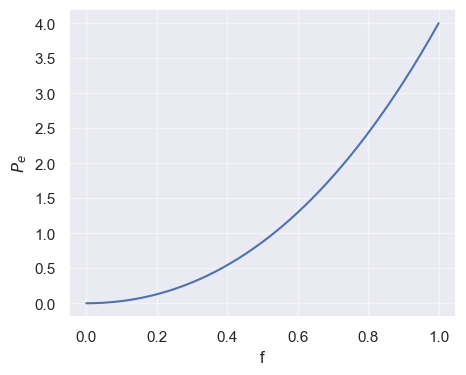

In [31]:
# probability error for error correcting code whit 3 digits and two equiprobable outcomes

f=np.linspace(0,1,1000)
P_e=[]

for i in f:
    P_e.append(3*pow(i,2)+pow(i,3))

plt.figure(figsize=(5,4))   
plt.plot(f,P_e)
plt.xlabel("f")
plt.ylabel("$P_e$")
plt.grid(alpha=0.5)
plt.show()

We can generalize in the case of $R_K$ code with majority rule decoding:
$$
P_e=\sum_{n=\lfloor K/2\rfloor +1}^K \binom{K}{n}f^n(1-f)^{K-n}\approx \binom{K}{\lfloor K/2\rfloor +1}f^{\lfloor K/2\rfloor +1}(1-f)^{K-\lfloor K/2\rfloor +1}
$$

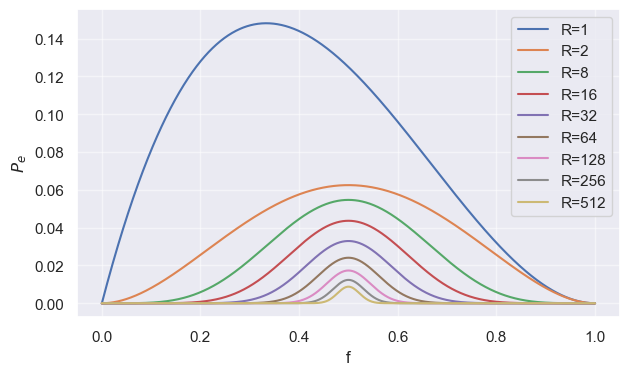

In [32]:
def prob_error(K, f):
    binomial_coeff = math.factorial(K) / (math.factorial(K // 2 + 1) * math.factorial(K - K // 2 - 1))
    term1 = f ** (K // 2 + 1)
    term2 = (1 - f) ** (K - K // 2 + 1)
    
    result = binomial_coeff * term1 * term2
    return result


K = np.array([1,2,8,16,32,64,128,256,512])
F=np.linspace(0,1,1000)

results=np.zeros((len(K),len(F)))

for i,k in enumerate(K):
    for j,f in enumerate(F):
        results[i][j]=prob_error(k,f)

plt.figure(figsize=(7,4))   
plt.xlabel("f")
plt.ylabel("$P_e$")
plt.grid(alpha=0.5)
for i,k in enumerate(K):
    plt.plot(F,results[i],label="R={}".format(k))
plt.legend()
plt.show()

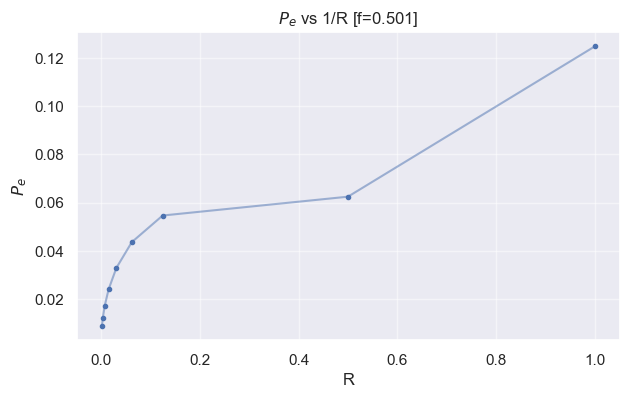

f: 0.501 

     K     R=1/K       P_e
0    1  1.000000  0.124875
1    2  0.500000  0.062500
2    8  0.125000  0.054687
3   16  0.062500  0.043640
4   32  0.031250  0.032929
5   64  0.015625  0.024083
6  128  0.007812  0.017325
7  256  0.003906  0.012357
8  512  0.001953  0.008775


In [33]:
f=0.5               # flipping probability
n=int(f*1000)

plt.figure(figsize=(7,4))   
plt.xlabel("R")
plt.ylabel("$P_e$")
plt.grid(alpha=0.5)
plt.scatter(1/K,results[:,n],marker=".")
plt.plot(1/K,results[:,n],alpha=0.5)
plt.title("$P_e$ vs 1/R [f={}]".format(np.round(F[n],3)))
plt.show()

df_K_R=pd.DataFrame({"K":K,"R=1/K":1/K,"P_e":results[:,n]})
print("f:",np.round(F[n],3),"\n")
print(df_K_R)

We want to achive the best trade-off between $P_e$ and $R$, but repetition codes don't necessarily guarantees it.

#### 3.2.1 Hamming code

Now consider the *hamming code* $H(7,4)$ defined as:
$$
H_7: \mathcal{A}_X^4 \rightarrow \mathcal{A}_Z \in B^7, \quad x^{(4)} \in \mathcal{A}_X^4 \mapsto Gz^{(4)}, \quad z^{(4)}=E(X^{(4)})
$$

$$
G=
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 1 & 1 & 0 \\
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
\end{pmatrix}
= \binom{I_4}{P}
$$

Sums (included in the matrix moltiplication) are module 2 (i.e. $1 \oplus 1=0$, $1 \oplus 1 \oplus 1 =1$). This codewords include the standard encoding of a message sequence from $\mathcal{A}_X^{(4)}$ ($z_1,z_2,z_3,z_4$) plus some parity-check bits
$$
z_5=z_1\oplus z_2 \oplus z_3, \quad z_6=z_2\oplus z_3 \oplus z_4, \quad z_7=z_1\oplus z_2 \oplus z_4
$$
Assuming the channel is a binary symmetric channel, and the messages are equiprobable, the MAP decoder identifies the encoded vector $z$ as the vector which differs from $y$ in the lowest number of bits:
$$
y=z \oplus \epsilon
$$

where $\epsilon$ is a bit-flip noise vector whose i-th entry is 1 if the i-th bit has been flipped, and 0 otherwise. If $M(\epsilon)$ is the number of 1es in $\epsilon$:
$$
P(\epsilon)=P(M(\epsilon))=\binom{K}{m}f^m(1-f)^{K-m}=P(y|x)=P(y|E^{-1}(y-\epsilon))
$$
if $z=E(x)$ and $y$ differ by $m$ bits. Hence we obtain:
$$
\argmax_x{P(x|y)}=\argmax_x{P(y|x)}=E^{-1}\left( y- \argmax_{\{\epsilon:y-\epsilon \in \mathcal{A}_Z\}}P(y|y-\epsilon)\right)=E^{-1}\left( y- \argmin_{\{\epsilon:y-\epsilon \in \mathcal{A}_Z\}}M(\epsilon)\right)
$$

In order to identify the $z \in \mathcal{A}_Z$ which differ from $y$ in the lowest number of bits we proceed as follows. Given $y$ it's always possible to find a $z \in \mathcal{A}_Z$ that differs from $y$ by only 1 bit-flip: 1 bit error patterns are mapped one-to-one with parity-check violations. Consider the parity-check matrix $H$:
$$
H=
\begin{pmatrix}
1 & 1 & 1 & 0 & 1 & 0 & 0\\
0 & 1 & 1 & 1 & 0 & 1 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 1\\
\end{pmatrix}
= \left(-P\quad I_3\right)
$$
Define the *syndrome* $s$ as the vector of parity-check violations
$$
s=Hy=H(z \oplus \epsilon)=H(Gz^{(4)}\oplus \epsilon)=H\epsilon
$$
There are $2^3 = 8$ possible one-flip errors and 8 possible syndromes.

The decoder $D_{MAP}$ maps $y \mapsto E^{-1}(y)$ if the syndrome is zero, otherwise it exploits the mapping of non-zero syndromes $s$ onto one-bit error patterns $\epsilon$ to unflip the suspect bit, as one can see in the table below.

<img src="fig4.png" alt="Drawing" style="width: 700px;"/>

This decoding will fail whenever more that one bit flip occurs. However, this occurs with low probability $P_e=\mathcal{O}(f^2)$.

#### 3.2.2. Channel capacity

The *channel capacity* $C>0$ is defined as the maximum over all sources (i.e., over all source probabilities $p_X(x)$) of the mutual information between the source and the received message:
$$
C=\max_X I(X:Y)
$$
If the channel is noiseless, $I(X : Y ) = H(X)$ and $C = \max_X H(X)$. As we already know from Shannon’s source coding theorem, for noiseless channels it is possible to achieve a rate $R$ close to $H(X)$ with error $P_e \rightarrow 0$.

### 3.3. Noisy channel coding theorem

Let's define a $(K,n)$ block code as a list of $2^K$ codewords from $\mathcal{A}_Z^{(n)}$:
$$
S=\{z_1,...,z_{2^K}\} \subset \mathcal{A}_Z^{(n)}
$$

Using this code we can encode a signal $X\in\mathcal{A}_X, |\mathcal{A}_X|=2^K$:

$$
E: \mathcal{A}_X \rightarrow S \subset \mathcal{A}_Z^{(n)}
$$
this code maps each $x_i\in \mathcal{A}_X$ to a codeword $z_i\in \mathcal{A}_Z^{(n)}$. The rate of information trasmission is $R=K/n$ as we need codewords of length $n$ to encode $K$ bits of information.


--------------

## Information in times series

### Markov's chains

Let's consider a stochastic process, i.e a collection of random variables $\chi=\{X_t\}$.

If $t\in U \subseteq \mathbb{N}$ the process is *discrete*.

A process is *stationary* if the joint distribution of any subset of variables is invariant w.r.t. shifts in time indices.

A stochasic process has the *Markov property* if:
$$
P(X_n|X_{n-1},X_{n-1},...,X_1)=P(X_n|X_{n-1})
$$

The MC is time-invariant if $P(X_n|X_{n-1})$ does not depend on $n$, and it can be represent by a matrix:
$$
P_{kl}=P(X_n=x_k|X_{n-1}=x_l)
$$
$$
P_{X_n}(x_k)=\sum_l P_{kl}P_{X_{n-1}}(x_l)
$$

A *stationary distribution* is a distribution that is invariant under the chain:
$$
\pi_k=\sum_l P_{kl}\pi_l
$$

The stationary distribution, under mild conditions, is the *limiting distribution* of the MC:
$$
P_{X_n}\rightarrow \pi , \quad n \rightarrow \infty
$$

$\pi$ is the *equilibrium distribution* of the MC if it is:
- *irreducible*: any state can be reached from any other in a finite number of steps ($\forall \quad k,l \quad \exists \quad n \quad| \quad P_{kl}^n>0$)
- *aperiodic*: cycles do not have hany periodicity, i.e. theri lengths are not multiples of a given number $\kappa>0$

If a MC have both proprieties is called *ergodic*.

A MC is *time-reversible* if, ones equilibrium is reached, the probability of any trajectory coincides with the probability of reverse trajectory. This condition implies *detail balance*:
$$
P_{ij}\pi_j=P_{ji}\pi_j
$$

If the detail balance holds respect to a distribution $\pi$, then $\pi$ must be the stationary distribution for the chain:
$$
\sum_jP_{ij}\pi_j=\sum_jP_{ji}\pi_j=\pi_i, \quad \sum_jP_{ji}=1
$$

### Entropy production in Markov chains

The entropy produced by the MC up to step $n$ is
$$
H[\chi]=H[X_n,X_{n-1},...,X_1]
$$

The *entropy rate* is defined as:
$$
H[\chi]=\lim_{n\rightarrow \infty}\frac{1}{n}H[X_n,X_{n-1},...,X_1]
$$

The *entropy production* is:
$$
H'[\chi]=\lim_{n\rightarrow \infty}\frac{1}{n}H[X_n|X_{n-1},...,X_1]
$$
when the limit is defined.

We also have:
$$
H[X_{n+1}|X_n,...,X_1]\leq H[X_{n+1}|X_n,...,X_2]=H[X_n|X_{n-1},...,X_1]
$$
where the inequality stems from the fact that conditioning reduces entropy, and the equality from stationarity. Since $H[X_n|X_{n-1},...,X_1]$ is a sequence of positive decreasing numbers, it has a well-defined limit as $n\rightarrow \infty$. But we have:
$$
\frac{1}{n}H[X_n,X_{n-1},...,X_1]=\frac{1}{n}\sum_i H[X_i|X_{i-1},...,X_1]
$$

Using the Cesareo mean lemma:
$$
\text{if}\quad b_n=\frac{1}{n}\sum_i a_i \quad \text{and}\quad \lim_{n\rightarrow \infty}a_n=a,  \implies \lim_{n\rightarrow \infty}b_n=a
$$

we obtain:
$$
H[\chi]=\lim_{n\rightarrow \infty}\frac{1}{n}H[X_n,X_{n-1},...,X_1]=\lim_{n\rightarrow \infty}\frac{1}{n}\sum_i H[X_i|X_{i-1},...,X_1]=H'[\chi]
$$

Sequences defined by stationary process are typical in the sense that:
$$
-\frac{1}{n}\log p(x_1,...,x_n) \rightarrow H[\chi]
$$

For stationary MC the entropy is:
$$
H[\chi]=H'[\chi]=H[X_n|X_{n-1}]
$$

which can be computed as:
$$
H[X_n|X_{n-1}]=\sum_k p(X_{n-1}=k)H[X_n|X_{n-1}=k]=\sum_k \pi_k \sum_l P_{kl}\log P_{kl}
$$

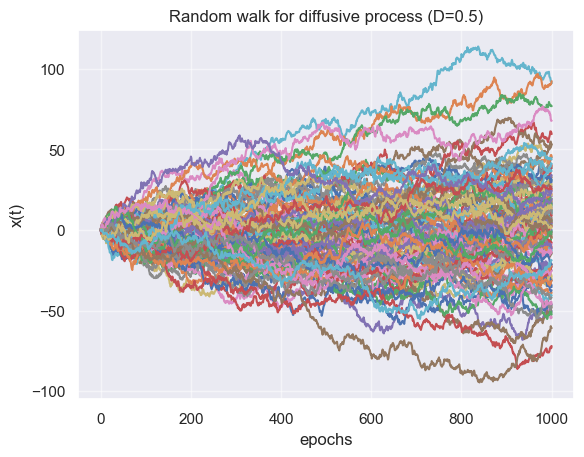

In [6]:
# params
N = 100
N_steps = int(1e3) 
D_coeff = 0.5  
step_size = np.sqrt(2 * D_coeff)  

positions = np.zeros((N, N_steps+1))

# random walk for each particle
for i in range(1, N_steps+1):
    noise = np.random.normal(loc=0, scale=step_size, size=N)
    positions[:, i] = positions[:, i-1] + noise

for i in range(N):
    plt.plot(range(N_steps+1), positions[i, :])

plt.xlabel("epochs")
plt.ylabel("x(t)")
plt.title("Random walk for diffusive process (D={})".format(D_coeff))
plt.grid(alpha=0.5)
plt.show()

--------------

## Problems of high-dimentional inference

Let's consider a dynamical system inference: the data are observed time series $\mathbf{y}_t\in \mathbb{R}^D$, where $D$ is the number of time series and $t=1,...,T$.

We usually assume a *generative model* for $\mathbf{y}_t$: in other words $\mathbf{y}_t$ is a realization of a *stochastic process* $\mathbf{Y}_t$ i.e. a collection of random variables parametrized by $t$ and characterized by a probability density
$$
f_{\mathbf{Y}}(\mathbf{y}_1,...,\mathbf{y}_T)
$$

A simple example of this kind of process is the vector autoregressive process (VAR) where:
$$
\mathbf{y}_t=V\mathbf{y}_{t-1} + \mathbf{\epsilon}
$$

$V$ is a $D\times D$ matrix that models a deterministic, linear dynamics, while $\mathbf{\epsilon}$ models additive noise.
Typically $\mathbf{\epsilon}\sim\mathcal{N}(0,\Sigma)$ with $\Sigma$ is the noise covariance matrix, so we have:
$$
\mathbf{y}_t\sim\mathcal{N}(V\mathbf{y}_{t-1},\Sigma) \implies f(\mathbf{y}_t|\mathbf{y}_{t-1})=\frac{1}{\sqrt{(2\pi \det \Sigma)^D}}e^{\frac{(\mathbf{y}_t-\mathbf{y}_{t-1})^T(\mathbf{y}_t-\mathbf{y}_{t-1}) }{\Sigma (\mathbf{y}_t-\mathbf{y}_{t-1})}}
$$

iterations:	 10000
------------------------------------------
exact area:	 0.7853981633974483
computed area:	 0.7899
deviation:	 0.0045018366025517675


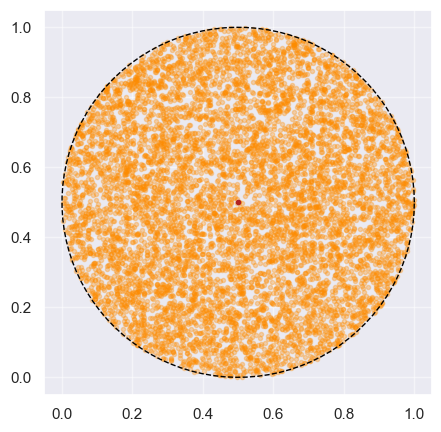

In [35]:
# a simple Monte Carlo sampling:
# let's try to compute the area of a circle centred in (1/2,1/2) and radius R=1/2

R = 1/2
x_0, y_0 = 1/2, 1/2

min_domain = 0
max_domain = 1

iterations = int(1e4)
partial = 0

xs=[]
ys=[]

for i in range(iterations):
    x,y = np.random.uniform(min_domain,max_domain), np.random.uniform(min_domain,max_domain)
    sample = pow(x-x_0,2) + pow(y-y_0,2)
    if (sample <= pow(R,2)):
        partial += 1
        xs.append(x)
        ys.append(y)
        
area = partial/iterations
exact_area = np.pi*pow(R,2)
sigma = abs(area-exact_area)

print("iterations:\t", iterations)
print("------------------------------------------")
print("exact area:\t",exact_area)
print("computed area:\t", area)
print("deviation:\t", sigma)

theta=np.linspace(0,2*np.pi,100)
X=R*np.cos(theta)+x_0
Y=R*np.sin(theta)+y_0

plt.figure(figsize=(5,5)) 
plt.scatter(xs,ys,alpha=0.3,color="darkorange",marker=".")
plt.scatter(x_0,y_0,color="firebrick",marker=".") 
plt.plot(X,Y,color="black",linestyle="dashed",lw=1)
plt.grid(alpha=0.5)
plt.show()

### Sampling from inverting CDF

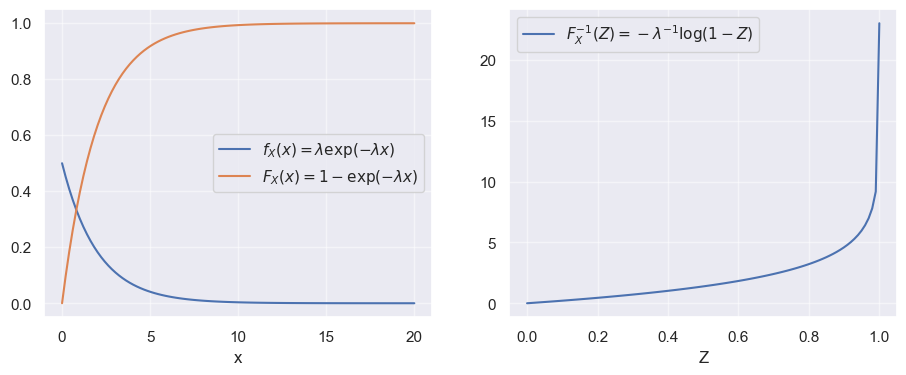

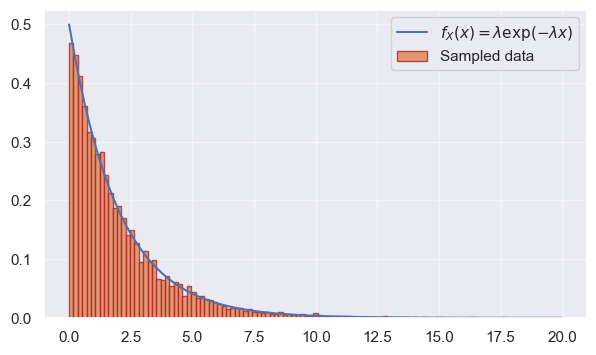

In [36]:
# sampling from an invertible CDF

lamb=0.5

x=np.linspace(0,20,100)
f_x=lamb*np.exp(-lamb*x)    # PDF
F_x=1-np.exp(-lamb*x)       # CDF 

z=np.linspace(0,0.99999,100)
G_z = -1/lamb*np.log(1-z)   # inverse CDF


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,4))
ax1.set(xlabel="x")
ax1.plot(x,f_x, label="$f_X(x)=\lambda \exp(-\lambda x)$")
ax1.plot(x,F_x, label="$F_X(x)=1- \exp(-\lambda x)$")
ax1.grid(alpha=0.5)
ax1.legend()

ax2.set(xlabel="Z")
ax2.plot(z,G_z, label="$F_X^{-1}(Z)=-\lambda^{-1} \log (1-Z)$")
ax2.grid(alpha=0.5)
ax2.legend();

# sampling:

iterations = int(1e4)
partial = []

for i in range(iterations):
    z=np.random.uniform(0,1)
    partial.append(-1/lamb*np.log(1-z))

counts, bins = np.histogram(partial, bins=100)

plt.figure(figsize=(7,4))   
plt.plot(x,f_x, label="$f_X(x)=\lambda \exp(-\lambda x)$")
plt.hist(partial, density=True, bins=100, label="Sampled data", edgecolor="firebrick", alpha=0.8)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Rejection sampling

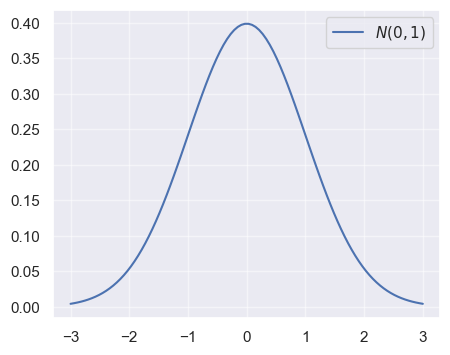

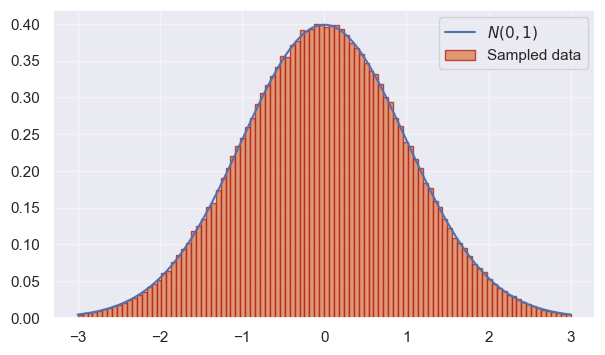

In [3]:
# rejection sampling

a=-3
b=-a

sigma=1

x=np.linspace(a,b,100)
f_x=1/(np.sqrt(2*np.pi*sigma**2))*np.exp((-x**2)/(2*sigma**2))
M=max(f_x)

plt.figure(figsize=(5,4))  
plt.plot(x,f_x, label="$N(0,{})$".format((sigma**2)))
plt.grid(alpha=0.5)
plt.legend()
plt.show()


# sampler

iterations=int(1e6)
partial=[]

for i in range(iterations):
    z_1=np.random.uniform(0,1)
    y=a+z_1*(b-a)               # !!!! wrong formula in the notes !!!!

    z_2=np.random.uniform(0,1)
    cutoff=(1/(np.sqrt(2*np.pi*sigma**2))*np.exp((-y**2)/(2*sigma**2)))/M

    if (z_2<=cutoff):
        partial.append(y)


plt.figure(figsize=(7,4))   
plt.plot(x,f_x, label="$N(0,{})$".format(sigma**2))
plt.hist(partial, density=True, bins=100, label="Sampled data", edgecolor="firebrick", alpha=0.8)
plt.grid(alpha=0.5)
plt.legend()
plt.show()   

### Gibbs sampler

Let's try to implement a Gibbs sampler for a bivariate gaussian distribution.

The joint probability distribution is:
$$
P(x,y)=\frac{1}{2\pi \sigma_x \sigma_y\sqrt{1- \rho^2}}\exp{\left[ -\frac{1}{2(1-\rho^2)}\left( \frac{(x-\mu_x)^2}{\sigma_x^2}+
\frac{(y-\mu_y)^2}{\sigma_y^2}-2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y}\right)\right]}
$$
where $\mu_{x,y}$ and $\sigma_{x,y}$ are the mean and standard deviation of $x$ and $y$ respectively, and $\rho$ is their correlation coefficient.

The samples are generated from the conditional distributions $P(x|y)$ and $P(y|x)$ using:
$$
P(x|y)=\mathcal{N}\left( \mu_x + \rho \frac{\sigma_x}{\sigma_y}(y-\mu_y),(1-\rho^2)\sigma_x^2\right)
$$

In [12]:
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[0, 0] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[1, 1] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)

def gibbs_sampler(mus, sigmas, iterations=5000):
    samples = []
    y = mus[1]
    for _ in range(iterations):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples.append([x, y])
    return samples


* mean vector:
 [-0.0007869470684540539, -0.0015351129262313706] 

* covariance matrix:
 [[0.04256933 0.0417284 ]
 [0.0417284  0.04248505]]


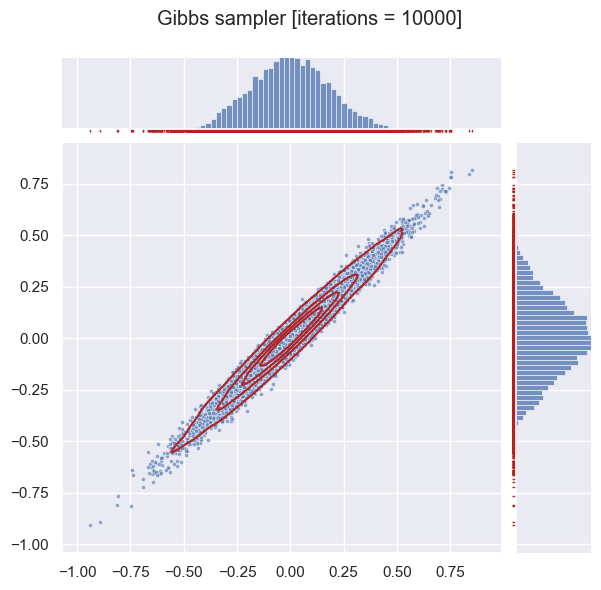

<Figure size 2000x2000 with 0 Axes>

In [15]:
mus = np.asarray([0, 0])
sigmas = np.asarray([[1,0.98],[0.98,1]])
iterations = int(1e4)

samples = gibbs_sampler(mus, sigmas, iterations=iterations)

burn = 100
x, y = zip(*samples[burn:])


data_gibbs=np.array([[i for i in x],[j for j in y]])
cov_gibbs = np.cov(data_gibbs)
print("* mean vector:\n", [np.mean(x),np.mean(y)],"\n")
print("* covariance matrix:\n", cov_gibbs)



# Plotting samples
g=sns.jointplot(x=x, y=y, alpha=0.6, marker=".")
g.plot_joint(sns.kdeplot, color="firebrick", zorder=1, levels=5)
g.plot_marginals(sns.rugplot, color="firebrick", height=-.05, clip_on=False);
plt.suptitle(f"Gibbs sampler [iterations = {iterations}]")
plt.subplots_adjust(top=0.9) 
plt.figure(figsize=(20,20));

### Hamiltonian Monte Carlo

$$
H(x,p)=\sum_i \frac{p_i^2}{2m_i}+U(x)
$$

$$
\dot{x_i}=\partial_{p_i}H(\mathbf{x},\mathbf{p}), \quad \dot{p_i}=-\partial_{p_i}H(\mathbf{x},\mathbf{p})
$$


$$
\dot{x_i}=\frac{p_i}{m_i}, \quad \dot{p_i}=-\partial_{x_i}U(x)
$$

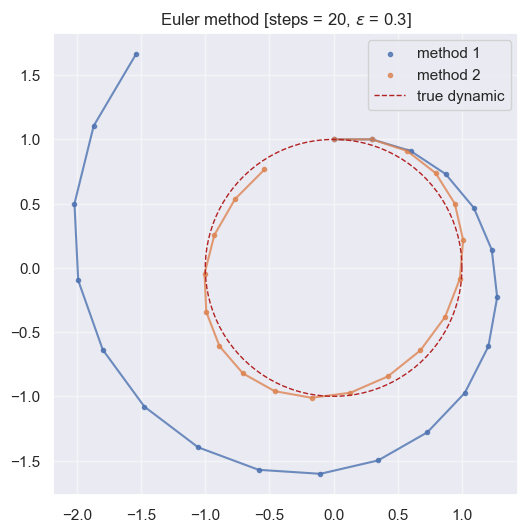

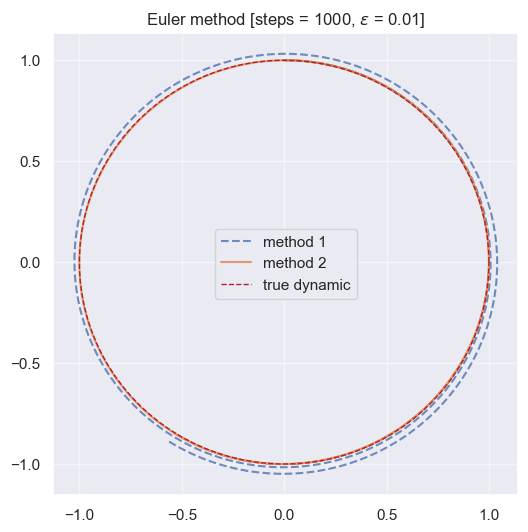

In [40]:
def HO_dynamics_1(steps, epsilon, m=1, x_0=0, p_0=1):
    q_dynamics=np.zeros(steps)
    p_dynamics=np.zeros(steps)

    q_dynamics[0]=x_0
    p_dynamics[0]=p_0

    for i in range(steps-1):
        q_dynamics[i+1]=q_dynamics[i]+(epsilon/m)*p_dynamics[i]
        p_dynamics[i+1]=p_dynamics[i]-epsilon*q_dynamics[i]

    return (q_dynamics, p_dynamics)


def HO_dynamics_2(steps, epsilon, m=1, x_0=0, p_0=1):
    q_dynamics=np.zeros(steps)
    p_dynamics=np.zeros(steps)

    q_dynamics[0]=x_0
    p_dynamics[0]=p_0

    for i in range(steps-1):
        p_dynamics[i+1]=p_dynamics[i]-epsilon*q_dynamics[i]
        q_dynamics[i+1]=q_dynamics[i]+(epsilon/m)*p_dynamics[i+1]

    return (q_dynamics, p_dynamics)


# test:

x_0=0
y_0=0
R=1

theta=np.linspace(0,2*np.pi,100)
X=R*np.cos(theta)+x_0
Y=R*np.sin(theta)+y_0

steps=20
epsilon=0.3

q_dynamics_1, p_dynamics_1 = HO_dynamics_1(steps,epsilon)
q_dynamics_2, p_dynamics_2 = HO_dynamics_2(steps,epsilon)

plt.figure(figsize=(6,6))
plt.plot(q_dynamics_1,p_dynamics_1, alpha=0.8,)
plt.scatter(q_dynamics_1,p_dynamics_1, alpha=0.8, marker=".", label="method 1")
plt.plot(q_dynamics_2,p_dynamics_2, alpha=0.8,)
plt.scatter(q_dynamics_2,p_dynamics_2, alpha=0.8, marker=".", label="method 2")
plt.plot(X,Y,color="firebrick",linestyle="dashed",lw=1,label="true dynamic")
plt.legend()
plt.grid(alpha=0.5)
plt.title(f"Euler method [steps = {steps}, $\epsilon$ = {epsilon}]")
plt.show()


steps=1000
epsilon=0.01

q_dynamics_1_dense, p_dynamics_1_dense = HO_dynamics_1(steps,epsilon)
q_dynamics_2_dense, p_dynamics_2_dense = HO_dynamics_2(steps,epsilon)

plt.figure(figsize=(6,6))
plt.plot(q_dynamics_1_dense,p_dynamics_1_dense, ls="--", alpha=0.8, label="method 1")
plt.plot(q_dynamics_2_dense,p_dynamics_2_dense, alpha=0.8, label="method 2")
plt.plot(X,Y,color="firebrick",linestyle="dashed",lw=1,label="true dynamic")
plt.legend()
plt.grid(alpha=0.5)
plt.title(f"Euler method [steps = {steps}, $\epsilon$ = {epsilon}]")
plt.show()

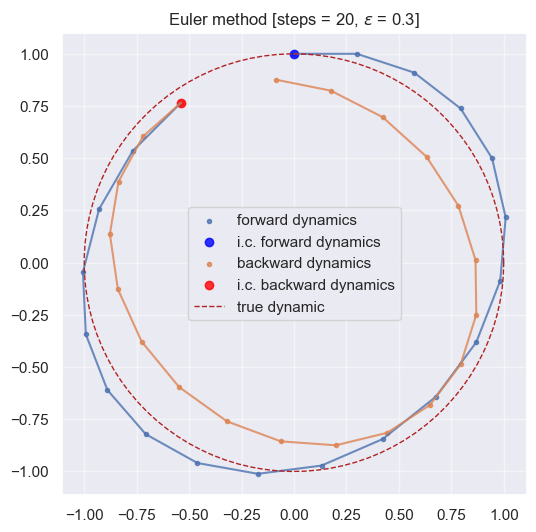

In [41]:
def HO_dynamics_time_reversal(steps, epsilon, m=1, x_0=0, p_0=1):
    # forward dynamics
    q_dynamics_forward=np.zeros(steps)
    p_dynamics_forward=np.zeros(steps)

    q_dynamics_forward[0]=x_0
    p_dynamics_forward[0]=p_0

    for i in range(steps-1):
        p_dynamics_forward[i+1]=p_dynamics_forward[i]-epsilon*q_dynamics_forward[i]
        q_dynamics_forward[i+1]=q_dynamics_forward[i]+(epsilon/m)*p_dynamics_forward[i+1]

    # backward dynamics
    p_dynamics_backward=np.zeros(steps)
    q_dynamics_backward=np.zeros(steps)

    q_dynamics_backward[0]=q_dynamics_forward[-1]
    p_dynamics_backward[0]=-p_dynamics_forward[-1] 

    for i in range(steps-1):
        p_dynamics_backward[i+1]=p_dynamics_backward[i]-epsilon*q_dynamics_backward[i]
        q_dynamics_backward[i+1]=q_dynamics_backward[i]+(epsilon/m)*p_dynamics_backward[i+1]
  
    return(q_dynamics_forward, p_dynamics_forward, q_dynamics_backward , -p_dynamics_backward)


# test:

x_0=0
y_0=0
R=1

theta=np.linspace(0,2*np.pi,100)
X=R*np.cos(theta)+x_0
Y=R*np.sin(theta)+y_0

steps=20
epsilon=0.3

q_dynamics_for, p_dynamics_for, q_dynamics_rev, p_dynamics_rev = HO_dynamics_time_reversal(steps,epsilon)

plt.figure(figsize=(6,6))
plt.plot(q_dynamics_for,p_dynamics_for, alpha=0.8,)
plt.scatter(q_dynamics_for,p_dynamics_for, alpha=0.8, marker=".", label="forward dynamics")
plt.scatter(q_dynamics_for[0],p_dynamics_for[0], alpha=0.8 ,color="blue",label="i.c. forward dynamics")
plt.plot(q_dynamics_rev,p_dynamics_rev, alpha=0.8,)
plt.scatter(q_dynamics_rev,p_dynamics_rev, alpha=0.8, marker=".", label="backward dynamics")
plt.scatter(q_dynamics_rev[0],p_dynamics_rev[0], alpha=0.8 ,color="red", label="i.c. backward dynamics")
plt.plot(X,Y,color="firebrick",linestyle="dashed",lw=1,label="true dynamic")
plt.legend()
plt.grid(alpha=0.5)
plt.title(f"Euler method [steps = {steps}, $\epsilon$ = {epsilon}]")
plt.show()

condition for stable trajectory: True


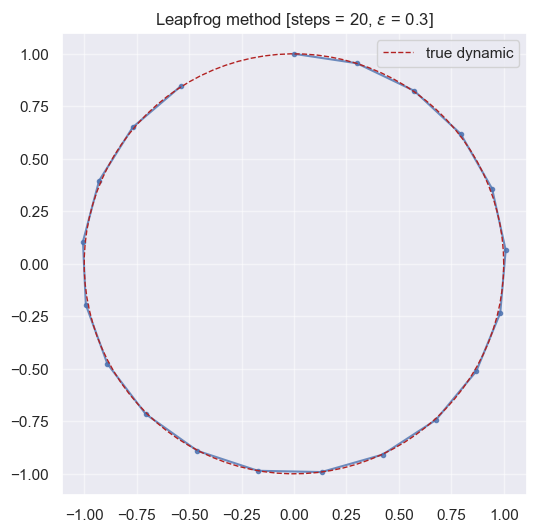

In [42]:
def HO_dynamics_lp(steps, epsilon, m=1, x_0=0, p_0=1, sigma=1):
    hlf_eps=epsilon/2

    q_dynamics=np.zeros(steps)
    p_dynamics=np.zeros(steps)

    q_dynamics[0]=x_0
    p_dynamics[0]=p_0

    for i in range(steps-1):
        p_dynamics[i+1]=p_dynamics[i]-(hlf_eps/sigma**2)*q_dynamics[i]
        q_dynamics[i+1]=q_dynamics[i]+(epsilon/m)*p_dynamics[i+1]
        p_dynamics[i+1]=p_dynamics[i+1]-(hlf_eps/sigma**2)*q_dynamics[i+1]

    return (q_dynamics, p_dynamics)


# test:

x_0=0
y_0=0
R=1

theta=np.linspace(0,2*np.pi,100)
X=R*np.cos(theta)+x_0
Y=R*np.sin(theta)+y_0

steps=20
epsilon=0.3
sigma=1

print("condition for stable trajectory:", epsilon<2*sigma)

q_dynamics_lp, p_dynamics_lp = HO_dynamics_lp(steps,epsilon,sigma)

plt.figure(figsize=(6,6))
plt.plot(q_dynamics_lp,p_dynamics_lp, alpha=0.8,)
plt.scatter(q_dynamics_lp,p_dynamics_lp, alpha=0.8, marker=".")
plt.plot(X,Y,color="firebrick",linestyle="dashed",lw=1,label="true dynamic")
plt.grid(alpha=0.5)
plt.legend()
plt.title(f"Leapfrog method [steps = {steps}, $\epsilon$ = {epsilon}]")
plt.show()

condition for stable trajectory: True


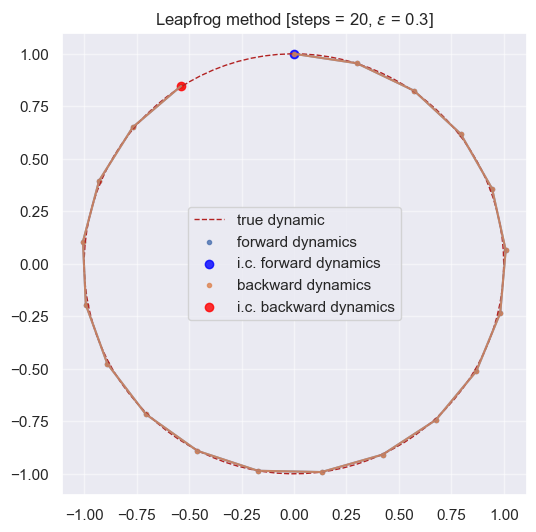

In [43]:
def HO_dynamics_time_reversal_lp(steps, epsilon, m=1, x_0=0, p_0=1, sigma=1):
    hlf_eps=epsilon/2

    # forward dynamics
    q_dynamics_forward=np.zeros(steps)
    p_dynamics_forward=np.zeros(steps)

    q_dynamics_forward[0]=x_0
    p_dynamics_forward[0]=p_0

    for i in range(steps-1):
        p_dynamics_forward[i+1]=p_dynamics_forward[i]-(hlf_eps/sigma**2)*q_dynamics_forward[i]
        q_dynamics_forward[i+1]=q_dynamics_forward[i]+(epsilon/m)*p_dynamics_forward[i+1]
        p_dynamics_forward[i+1]=p_dynamics_forward[i+1]-(hlf_eps/sigma**2)*q_dynamics_forward[i+1]

    # backward dynamics
    p_dynamics_backward=np.zeros(steps)
    q_dynamics_backward=np.zeros(steps)

    q_dynamics_backward[0]=q_dynamics_forward[-1]
    p_dynamics_backward[0]=-p_dynamics_forward[-1] 

    for i in range(steps-1):
        p_dynamics_backward[i+1]=p_dynamics_backward[i]-(hlf_eps/sigma**2)*q_dynamics_backward[i]
        q_dynamics_backward[i+1]=q_dynamics_backward[i]+(epsilon/m)*p_dynamics_backward[i+1]
        p_dynamics_backward[i+1]=p_dynamics_backward[i+1]-(hlf_eps/sigma**2)*q_dynamics_backward[i+1] 

    return(q_dynamics_forward, p_dynamics_forward, q_dynamics_backward , -p_dynamics_backward)


# test:

x_0=0
y_0=0
R=1

theta=np.linspace(0,2*np.pi,100)
X=R*np.cos(theta)+x_0
Y=R*np.sin(theta)+y_0

steps=20
epsilon=0.3

print("condition for stable trajectory:", epsilon<2*sigma)

q_dynamics_for, p_dynamics_for, q_dynamics_rev, p_dynamics_rev = HO_dynamics_time_reversal_lp(steps,epsilon)

plt.figure(figsize=(6,6))
plt.plot(X,Y,color="firebrick",linestyle="dashed",lw=1,label="true dynamic")
plt.plot(q_dynamics_for,p_dynamics_for, alpha=0.8,)
plt.scatter(q_dynamics_for,p_dynamics_for, alpha=0.8, marker=".", label="forward dynamics")
plt.scatter(q_dynamics_for[0],p_dynamics_for[0], alpha=0.8 ,color="blue", label="i.c. forward dynamics")
plt.plot(q_dynamics_rev,p_dynamics_rev, alpha=0.8)
plt.scatter(q_dynamics_rev,p_dynamics_rev, alpha=0.8, marker=".", label="backward dynamics")
plt.scatter(q_dynamics_rev[0],p_dynamics_rev[0], alpha=0.8 ,color="red",label="i.c. backward dynamics")
plt.legend()
plt.grid(alpha=0.5)
plt.title(f"Leapfrog method [steps = {steps}, $\epsilon$ = {epsilon}]")
plt.show()

samples accepted: 99.82600000000001 %


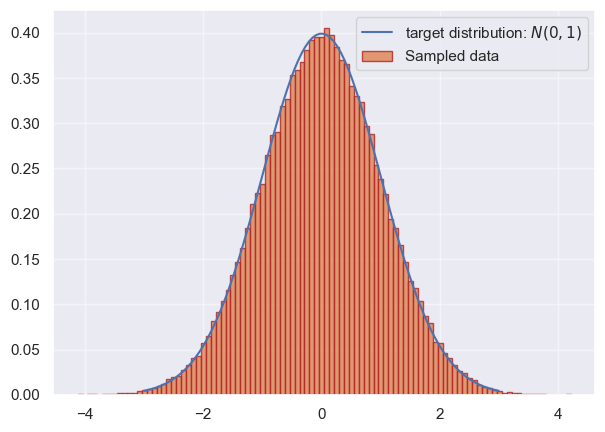

In [44]:
# the target distr to sample is is f(x)=N(x;mu,sigma^2) normal distr
# i build up an hamiltonian H(x,p)=-1/2 p^2 -U(x)
# with U(x)=-ln(f(x))

def boltzman_distr(x,p,mu,sigma):
    return 2*np.pi*sigma**2*np.exp(0.5*((x-mu)**2/sigma**2 +p**2))
    

# method params
iterations=int(1e5)
steps=100

# input params
mu=0
sigma=1

# sampler:
#epsilon=np.sqrt(sigma)
epsilon=0.3
hlf_eps=epsilon/2

samples=[]

x_tilde=np.random.uniform(0,1)
x=x_tilde

for j in range(iterations):

    # hamiltonian flow with leapfrog
    p_tilde=np.random.normal(0,1)    
    p=p_tilde

    for i in range(steps-1):
        p=p-(hlf_eps/sigma**2)*(x-mu)
        x=x+epsilon*p
        p=p-(hlf_eps/sigma**2)*(x-mu)

    x_prime=x
    p_prime=-p

    # rejection sampling
    cutoff=min(boltzman_distr(x_prime,p_prime,mu,sigma)/boltzman_distr(x_tilde,p_tilde,mu,sigma),1)
    r=np.random.uniform(0,1)
    
    if (r<cutoff):
        samples.append(x_prime)
    
    x=x_prime

print("samples accepted:",len(samples)/iterations*100,"%")

# plot
x_range=np.linspace(mu-(3*sigma),mu+(3*sigma),100)
f_x=1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x_range-mu)**2/(2*sigma**2))

plt.figure(figsize=(7,5))   
plt.plot(x_range,f_x, label="target distribution: $N({},{})$".format(mu,sigma**2))
plt.hist(samples, density=True, bins=100, label="Sampled data", edgecolor="firebrick", alpha=0.8)
plt.grid(alpha=0.5)
plt.legend()
plt.show()   

HMC method
* acceptance rate: 92.19 %

* mean vector:
 [-0.010633137508933611, -0.010646702602638594] 

* covariance matrix:
 [[1.00993481 0.98523984]
 [0.98523984 1.00511975]]


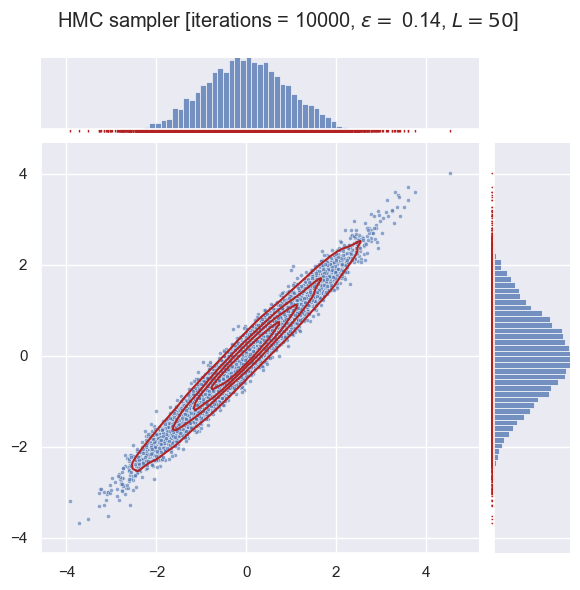

<Figure size 2000x2000 with 0 Axes>

In [3]:
# Parameters
iterations = int(1e4)
steps = 50

# Input parameters
Mus = np.array([0, 0])
Sigma = np.array([[1, 0.98], [0.98, 1]])

# Eigen decomposition
eigenvalues, eigenvectors = LA.eig(Sigma)
epsilon = min(np.sqrt(eigenvalues))
hlf_eps = epsilon / 2

mu_1 = Mus[0]
mu_2 = Mus[1]

sigma_1 = Sigma[0, 0]
sigma_2 = Sigma[1, 1]
rho = Sigma[0, 1]

# Boltzmann distribution function
def boltzman_distr(x, p, mu_1, mu_2, sigma_1, sigma_2, rho):
    x_1 = x[0]
    x_2 = x[1]
    p_1 = p[0]
    p_2 = p[1]

    #potential function that for our case is -ln(N(Mus,Sigma^2))
    U = np.log(2*np.pi*np.sqrt(1-rho**2)) + (0.5/(1-rho**2))*(((x_1-mu_1)/sigma_1)**2 + ((x_2-mu_2)/sigma_2)**2 - 2*rho* ((x_1-mu_1)*(x_2-mu_2))/(sigma_1*sigma_2))

    H = U + (p_1**2 + p_2**2) / 2

    return np.exp(-H) * (2 * np.pi * sigma_1 * sigma_2 * np.sqrt(1 - rho**2))

# Sampling
samples = []

x_tilde = np.array([np.random.normal(), np.random.normal()])
x = x_tilde

for j in range(iterations):

    # hamiltonian flow with leapfrog
    p_tilde = np.random.multivariate_normal(np.zeros(2), np.diag([1, 1]))
    p = p_tilde

    for i in range(steps):
        p = p - (hlf_eps / (1 - rho**2)) * ((x-Mus)/sigma_1**2 - rho * (x[::-1]-Mus[::-1])/(sigma_1*sigma_2))
        x = x + epsilon * p
        p = p - (hlf_eps / (1 - rho**2)) * ((x-Mus)/sigma_1**2 - rho * (x[::-1]-Mus[::-1])/(sigma_1*sigma_2))

    x_prime = x
    p_prime = -p

    # rejection sampling
    cutoff = min(boltzman_distr(x_prime, p_prime, mu_1, mu_2, sigma_1, sigma_2, rho)/boltzman_distr(x_tilde, p_tilde, mu_1, mu_2, sigma_1, sigma_2, rho),1)
    r = np.random.uniform(0, 1)

    if r < cutoff:
        samples.append(x_prime)

    x_tilde = x_prime

burn=0
# extracting samples
X_hmc, Y_hmc= zip(*samples[burn:])

acceptance_rate = np.round(len(X_hmc)/iterations*100,2)

print("HMC method")
print("* acceptance rate:", acceptance_rate,"%\n")

data_hmc=np.array([[x for x in X_hmc],[y for y in Y_hmc]])
cov_hmc = np.cov(data_hmc)
print("* mean vector:\n", [np.mean(X_hmc),np.mean(Y_hmc)],"\n")
print("* covariance matrix:\n", cov_hmc)


# Plotting samples

g=sns.jointplot(x=X_hmc, y=Y_hmc, alpha=0.6, marker=".")
g.plot_joint(sns.kdeplot, color="firebrick", zorder=1, levels=5)
g.plot_marginals(sns.rugplot, color="firebrick", height=-.05, clip_on=False);
plt.suptitle(f"HMC sampler [iterations = {iterations}, $\epsilon =$ {np.round(epsilon,2)}, $L = 50$]")
plt.subplots_adjust(top=0.9) 
plt.figure(figsize=(20,20));


In [4]:
# HMC

# Parameters
iterations = int(1e3)
steps = 150
dim = 100

# Input parameters
variances = np.square(np.linspace(0.01, 1.0, dim))
cov_matrix = np.diag(variances)
inv_cov_matrix = np.diag(1.0 / variances)
inv_cov_matrix[np.isinf(inv_cov_matrix)] = 0

epsilon_range = (0.0104, 0.0156)

# Boltzmann distribution function
def boltzman_distr(x, p, inv_cov_matrix):
    U = 0.5 * np.dot(x, np.dot(inv_cov_matrix, x))
    K = 0.5 * np.dot(p, p)
    H = U + K
    return np.exp(-H)

# Sampling
samples = np.zeros((iterations, dim))

x_tilde = np.random.multivariate_normal(np.zeros(dim), np.diag(np.ones(dim)))
x = x_tilde

for j in range(iterations):
    epsilon = np.random.uniform(0.0104, 0.0156)
    hlf_eps = epsilon / 2.0

    # Hamiltonian flow with leapfrog
    p_tilde = np.random.multivariate_normal(np.zeros(dim), np.diag(np.ones(dim)))
    p = p_tilde

    for _ in range(steps):
        p -= hlf_eps * np.dot(inv_cov_matrix, x)
        x += epsilon * p
        p -= hlf_eps * np.dot(inv_cov_matrix, x)

    x_prime = x
    p_prime = -p

    # Rejection sampling
    current_boltzman = boltzman_distr(x_tilde, p_tilde, inv_cov_matrix)
    proposed_boltzman = boltzman_distr(x_prime, p_prime, inv_cov_matrix)
    
    # Evaluate acceptance probability
    acceptance_prob = min(proposed_boltzman / current_boltzman, 1)
    r = np.random.uniform(0, 1)

    if r < acceptance_prob:
        samples[j] = x_prime
        
    x_tilde = x_prime


X_100d_hmc = samples

sample_mean_hmc = np.mean(X_100d_hmc, axis=0)
sample_cov_hmc = np.cov(X_100d_hmc, rowvar=False)
sample_cov_flat_hmc=[sample_cov_hmc[i,i] for i in range(dim)]

/var/folders/0d/wr4vslms6rx70gkgwp1_dz400000gn/T/ipykernel_94862/126073533.py:50: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_prob = min(proposed_boltzman / current_boltzman, 1)


In [5]:
# METROPOLIS

# Parameters
iterations = int(150000)
dim = 100

# Input parameters
variances = np.square(np.linspace(0.01, 1.0, dim))
cov_matrix = np.diag(variances)
inv_cov_matrix = np.diag(1.0 / variances)

# Target log probability function
def target_log_prob(x):
    return -0.5 * np.dot(x, np.dot(inv_cov_matrix, x))

# Metropolis algorithm
def metropolis_sampling(num_samples, stepsize_range):
    samples = np.zeros((num_samples, dim))
    x = np.random.randn(dim) * np.sqrt(variances)
    
    for i in range(num_samples):
        stepsize = np.random.uniform(stepsize_range[0], stepsize_range[1])
        proposal = x + stepsize * np.random.randn(dim)
        
        log_prob_current = target_log_prob(x)
        log_prob_proposal = target_log_prob(proposal)
        
        acceptance_prob = np.exp(log_prob_proposal - log_prob_current)
        
        if np.random.rand() < acceptance_prob:
            x = proposal
        
        samples[i] = x
    
    return samples

# Parameters
stepsize_range = (0.0176, 0.0264)

# Generate samples
samples = metropolis_sampling(iterations, stepsize_range)

X_100d_metr = samples

sample_mean_metr = np.mean(X_100d_metr, axis=0)
sample_cov_metr = np.cov(X_100d_metr, rowvar=False)
sample_cov_flat_metr=[sample_cov_metr[i,i] for i in range(dim)]

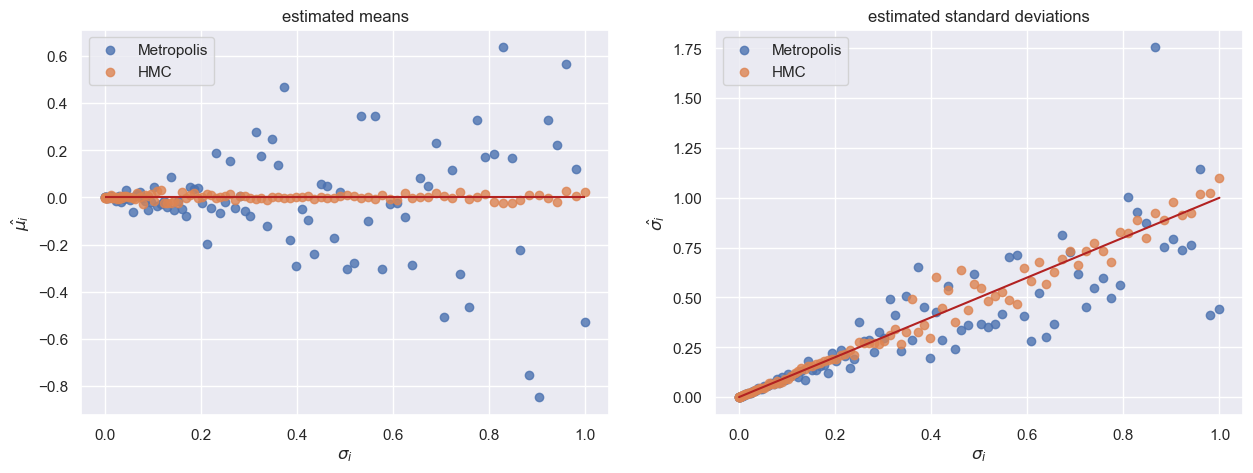

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(variances, sample_mean_metr, marker='o',label="Metropolis",alpha=0.8)
ax[0].scatter(variances, sample_mean_hmc, marker='o',label="HMC",alpha=0.8)
ax[0].hlines(0,0,1,colors="firebrick")
ax[0].set(xlabel="$\sigma_i$", ylabel='$\hat{\mu_i}$', title="estimated means" )
ax[0].legend()

# cov
ax[1].scatter(variances, sample_cov_flat_metr, marker='o',label="Metropolis",alpha=0.8)
ax[1].scatter(variances, sample_cov_flat_hmc, marker='o',label="HMC", alpha=0.8)
ax[1].plot(variances,variances, color="firebrick")
ax[1].set(xlabel="$\sigma_i$", ylabel='$\hat{\sigma_i}$',title="estimated standard deviations" )
ax[1].legend();